<br>

## 1. Data loading & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing # Scikit-learn (sklearn)

In [ ]:
# datasets.load # tab

In [2]:
datasets.load_boston() #.keys()

c:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# print(datasets.load_boston()['DESCR'])

In [7]:
# datasets.load_boston().data

In [3]:
df = pd.DataFrame(datasets.load_boston().data) # make a pandas DataFrame from numpy array
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

c:\Users\gmlkd\miniforge3\envs\fastcampus\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [5]:
sc = preprocessing.StandardScaler() # Apply standard scaling on x_data (Standardization)


x_data = sc.fit_transform(x_data)

print(x_data.shape)
print(y_data.shape)

(506, 13)
(506,)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [5]:
from sklearn import model_selection

In [6]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [8]:
sc = preprocessing.StandardScaler()

sc.fit(train_data)
train_data = sc.transform(train_data)

test_data = sc.transform(test_data)

print(x_data.shape)
print(y_data.shape)

(506, 13)
(506,)


<br>

## 3. Build & Train the model 

In [9]:
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [12]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=13, units=64, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4)) # Dropout-layer

model.add(layers.Dense(units=1, activation=None)) 

In [13]:
# "Compile" the model description (Configures the model for training)

model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.mean_squared_error, # MSE 
              metrics=[metrics.mean_squared_error]) # MSE

In [14]:
# "Fit" the model on training data

history = model.fit(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [15]:
# "Evaluate" the model on test data

result = model.evaluate(test_data, test_label)

print('loss (mean_squared_error) :', result[0])

5/5 [==============================] - 0s 7ms/step - loss: 17.1388 - mean_squared_error: 17.1388
loss (mean_squared_error) : 17.138843536376953


In [16]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

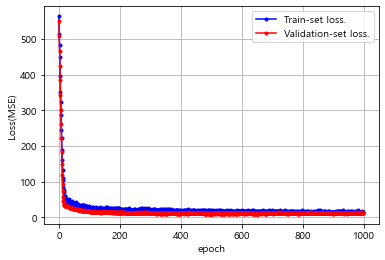

In [17]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

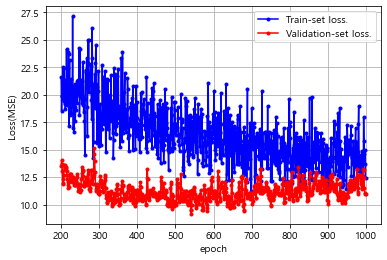

In [18]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

# epoch 200 ~ epoch 1000
plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [19]:
# "Predict" on test data

model.predict(test_data)

array([[22.232811 ],
       [27.269852 ],
       [23.337257 ],
       [ 9.109883 ],
       [19.900045 ],
       [18.451828 ],
       [23.906387 ],
       [20.065979 ],
       [20.072956 ],
       [12.562669 ],
       [ 9.585753 ],
       [ 8.697503 ],
       [14.621661 ],
       [ 8.279154 ],
       [35.88189  ],
       [34.801304 ],
       [23.93308  ],
       [37.855366 ],
       [29.814493 ],
       [21.065613 ],
       [22.877798 ],
       [19.7846   ],
       [19.340212 ],
       [25.954275 ],
       [19.991955 ],
       [25.241356 ],
       [15.959825 ],
       [16.301298 ],
       [39.67788  ],
       [17.970482 ],
       [15.065269 ],
       [16.64553  ],
       [18.45764  ],
       [18.54421  ],
       [27.471714 ],
       [21.787031 ],
       [ 5.7231555],
       [42.03977  ],
       [11.825365 ],
       [15.853536 ],
       [22.997395 ],
       [21.30009  ],
       [18.848614 ],
       [17.67827  ],
       [20.72106  ],
       [23.729752 ],
       [19.81491  ],
       [12.30

In [20]:
sample_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [21]:
sample_data = sc.transform(sample_data) # "transform" the sample data with fitted scaler (no "fit", just "transform")
model.predict(sample_data)

array([[23.729752]], dtype=float32)